<a href="https://colab.research.google.com/github/raviyadav44/Nlp_practice/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk


In [2]:
#nltk.download()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [4]:
train=pd.read_csv("/content/drive/MyDrive/twitter_fake_news/train_fake_news.csv")
test=pd.read_csv("/content/drive/MyDrive/twitter_fake_news/test_fake_news.csv")


In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


(array([4342.,    0.,    0.,    0., 3271.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

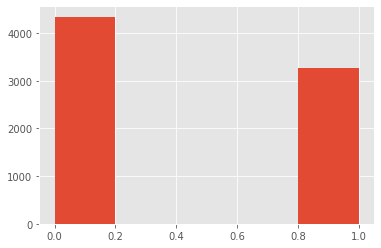

In [7]:
plt.hist(train['target'],bins=5,label=[0,1])

In [8]:
train['location'].isnull().sum()

2533

In [9]:
d=train.drop(['id','keyword','location','target'],axis=1)

In [10]:
d.shape

(7613, 1)

In [11]:
train.drop_duplicates(keep='first',inplace=True)

In [12]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [13]:
train=train.dropna()

In [14]:
train.shape

(5080, 5)

In [15]:
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


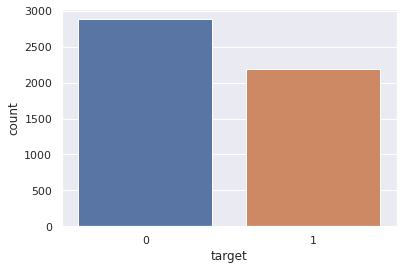

In [16]:
import seaborn as sns
sns.countplot("target",data=train);

In [17]:
train['text'][31]

'@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C'

In [18]:
message=train.copy()

In [19]:
message.reset_index(inplace=True)

In [20]:
#preprocessing of data
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemma=WordNetLemmatizer()
ps = PorterStemmer()
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)
corpus=[]
for i in range(0,(len(message))):
  words= remove_URL( message['text'][i])
  words=re.sub('[^a-zA-Z]',' ',words)
  words=re.sub('\W',' ', words)
  words=words.lower()
  words=words.split()
  words=[lemma.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
  words=' '.join(words)
  corpus.append(words)



In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1400,ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()

In [22]:
y=train['target']

In [23]:
X.shape

(5080, 1400)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [25]:
tfidf.get_feature_names()[:20]

['aba',
 'aba woman',
 'aba woman delivers',
 'abc',
 'ablaze',
 'accident',
 'account',
 'across',
 'act',
 'action',
 'actually',
 'added',
 'added video',
 'added video youtube',
 'affected',
 'affected fatal',
 'affected fatal outbreak',
 'aftershock',
 'ago',
 'agree']

In [26]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1400,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [29]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.785
Confusion matrix, without normalization


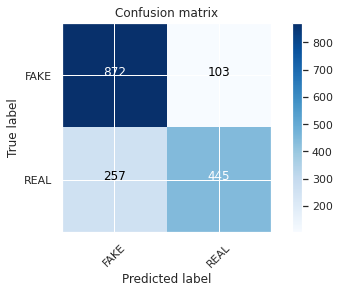

In [30]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [31]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.7853309481216458

Passive Aggressive Classifier Algorithm


In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.698
Confusion matrix, without normalization


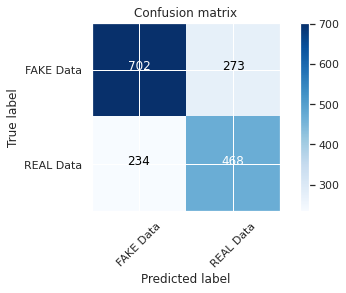

In [33]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Multinomial Classifier with Hyperparameter

In [34]:
classifier=MultinomialNB(alpha=0.1)

In [35]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.7740011926058438
Alpha: 0.1, Score : 0.7799642218246869
Alpha: 0.2, Score : 0.7805605247465712
Alpha: 0.30000000000000004, Score : 0.7823494335122242
Alpha: 0.4, Score : 0.7829457364341085
Alpha: 0.5, Score : 0.7835420393559929
Alpha: 0.6000000000000001, Score : 0.7841383422778772
Alpha: 0.7000000000000001, Score : 0.7829457364341085
Alpha: 0.8, Score : 0.7847346451997614
Alpha: 0.9, Score : 0.7841383422778772


In [36]:
feature_names = tfidf.get_feature_names()

In [37]:
classifier.coef_[0]

array([-7.69758951, -7.90365653, -7.90365653, ..., -7.27075744,
       -7.55019986, -7.14656743])

In [38]:

sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.898678166451858, 'fire'),
 (-5.544793054531557, 'building'),
 (-5.580128941668724, 'via'),
 (-5.586480643566784, 'police'),
 (-5.727202643714817, 'amp'),
 (-5.746145964766488, 'storm'),
 (-5.752158965392278, 'news'),
 (-5.7529026013603275, 'train'),
 (-5.76640287460276, 'accident'),
 (-5.781576079317595, 'disaster'),
 (-5.781983975017748, 'california'),
 (-5.78803969374143, 'attack'),
 (-5.808358453514003, 'hiroshima'),
 (-5.824556127633999, 'burning'),
 (-5.825111039219532, 'killed'),
 (-5.837841807807257, 'like'),
 (-5.864675747644723, 'crash'),
 (-5.8860767035097865, 'home'),
 (-5.892184007852933, 'emergency'),
 (-5.901052221014563, 'bomb')]

In [39]:
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-8.620311734718676, 'ancient'),
 (-8.620311734718676, 'awesome'),
 (-8.620311734718676, 'ball'),
 (-8.620311734718676, 'bear'),
 (-8.620311734718676, 'beat'),
 (-8.620311734718676, 'blew'),
 (-8.620311734718676, 'bloody'),
 (-8.620311734718676, 'cat'),
 (-8.620311734718676, 'catastrophe'),
 (-8.620311734718676, 'choice'),
 (-8.620311734718676, 'cover'),
 (-8.620311734718676, 'dance'),
 (-8.620311734718676, 'david'),
 (-8.620311734718676, 'disney'),
 (-8.620311734718676, 'dream'),
 (-8.620311734718676, 'fashion'),
 (-8.620311734718676, 'favorite'),
 (-8.620311734718676, 'gay'),
 (-8.620311734718676, 'gt gt gt'),
 (-8.620311734718676, 'hiring'),
 (-8.620311734718676, 'loved'),
 (-8.620311734718676, 'mayhem'),
 (-8.620311734718676, 'mode'),
 (-8.620311734718676, 'name'),
 (-8.620311734718676, 'nice'),
 (-8.620311734718676, 'nowplaying'),
 (-8.620311734718676, 'offensive'),
 (-8.620311734718676, 'offensive content'),
 (-8.620311734718676, 'panicking'),
 (-8.620311734718676, 'paul'),
 (-8